### Data preprocessing

### 1. Importing Libraries
imports the necessary libraries needed for Data preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("data/data_w_feature_eng.pkl")

### 2. Checks for Linear Separability

### 3. Checks for Dataset Balance 
generates a countplot to visually represent the distribution of labels in the dataset and prints additional information, including the total number of entries and label distribution.

Total Number of Entries before reduction: 202023
Distribution of Labels
label
1    101058
0    100965
Name: count, dtype: int64


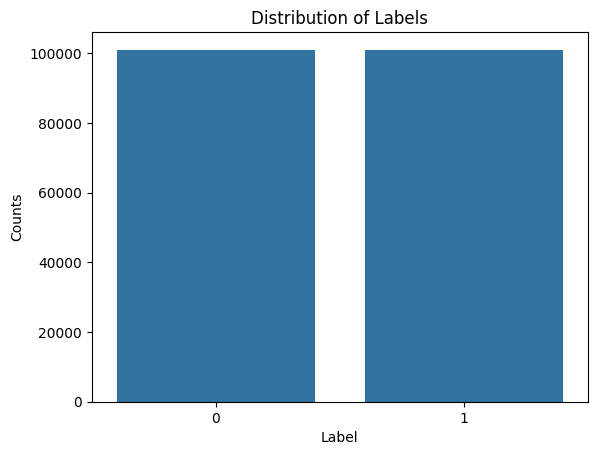

In [3]:
sns.countplot(data, x = "label")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Counts")

print("Total Number of Entries before reduction:",len(data))
print("Distribution of Labels")
print(data["label"].value_counts())


Dataset is balanced, no balancing action required

### 4. Checks for Dimensionality 
extracts generic features by removing text-related columns and representations. It provides insights into the number of generic features and the dimensions of text representations, aiding in understanding the structure of the dataset and the complexity of the features used.

In [4]:
data_features = data.drop(['comment','parent_comment','label','comment_tokens','parent_comment_tokens'],axis=1)

In [5]:
data_features_without_bow_tdidf = data_features.drop(['comment_bow','parent_comment_bow','comment_tdidf','parent_comment_tdidf', 'comment_tdidf_nn'],axis = 1)

In [6]:
data_features_without_bow_tdidf

,comment_tokens_bigram,parent_comment_tokens_bigram,comment_tokens_trigram,parent_comment_tokens_trigram,comment_score,parent_comment_score,weighted_parent_sentiment_score_neutral,weighted_parent_sentiment_score_positive,weighted_comment_sentiment_score_neutral,weighted_comment_sentiment_score_positive,...,comment_mean_token_length,parent_comment_mean_token_length,comment_char_count,parent_comment_char_count,comment_punctuation_count,parent_comment_punctuation_count,comment_hashtag_count,parent_comment_hashtag_count,comment_number_count,parent_comment_number_count
0,"[just shoot, shoot some, some unarmed, unarmed...","[a pregnant, pregnant police, police officer, ...","[just shoot some, shoot some unarmed, some una...","[a pregnant police, pregnant police officer, p...",-0.3818,-0.0523,True,False,False,False,...,4.125000,4.583333,53,193,1,5,0,0,0,0
1,"[is like, like saying, saying the, the relativ...","[well ,, , no, no ,, , it, is better, better ....","[that is like, is like saying, like saying the...","[well , no, , no ,, no , it, , it is, it is be...",-0.8126,-0.5709,False,False,False,False,...,6.125000,4.162162,143,259,2,9,0,0,0,0
2,"[except pluto, pluto would, would not, not giv...","[we would, would live, live out, out destiny, ...","[except pluto would, pluto would not, would no...","[we would live, would live out, live out desti...",0.3182,0.0000,True,False,False,True,...,4.222222,5.125000,51,61,0,1,0,0,0,0
3,"[are probably, probably right, right ,, , it, ...","[i really, really do, do not, not think, think...","[you are probably, are probably right, probabl...","[i really do, really do not, do not think, not...",0.4643,-0.7848,False,False,False,True,...,3.416667,4.473684,151,484,12,15,0,0,0,0
4,"[that 85, 85 hour, hour working, working abroa...","[am talkin, talkin bout, bout that, that veter...","[or that 85, that 85 hour, 85 hour working, ho...","[i am talkin, am talkin bout, talkin bout that...",-0.6428,-0.2023,True,False,False,False,...,4.272727,5.428571,84,114,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202018,"[my leg, leg are, are dangling, dangling off, ...","[bullet by, by hollywood, hollywood undead, un...","[my leg are, leg are dangling, are dangling of...","[bullet by hollywood, by hollywood undead, hol...",0.0000,0.0000,True,False,True,False,...,4.000000,5.500000,34,27,1,1,0,0,0,0
202019,"[chassis straightening, straightening maybe, m...","[diy chassis, chassis removal, removal ?]","[chassis straightening maybe, straightening ma...","[diy chassis removal, chassis removal ?]",0.0000,0.0000,True,False,True,False,...,6.500000,4.500000,28,20,1,1,0,0,0,0
202020,"[your blood, blood boiling, boiling because, a...","[this make, make my, my blood, blood boil, boi...","[is your blood, your blood boiling, blood boil...","[this make my, make my blood, my blood boil, b...",-0.7096,0.0000,True,False,False,False,...,4.750000,3.500000,47,25,1,1,0,0,0,0
202021,"[what man, man ..., ... you, do not, not like,...","[caster saying, saying pinch, pinch but, but n...","[what man ..., man ... you, ... you do, you do...","[caster saying pinch, saying pinch but, pinch ...",-0.2755,0.0000,True,False,False,False,...,3.900000,5.625000,81,56,6,1,0,0,0,0


In [7]:
print("Number of generic features:",data_features_without_bow_tdidf.shape[1])

Number of generic features: 32


In [8]:
print("Number of dimensions for bow:",data['comment_bow'][0].shape[1])# fyi: after adding bigrams and trigrams- 17805 to 43861
print("Number of dimensions for parent bow:",data['parent_comment_bow'][0].shape[1])#27187 to 102867
print("Number of dimensions for tdidf:",data['comment_tdidf'][0].shape[1])
print("Number of dimensions for parent tdidf:",data['parent_comment_tdidf'][0].shape[1])


Number of dimensions for bow: 43894
Number of dimensions for parent bow: 102930
Number of dimensions for tdidf: 43894
Number of dimensions for parent tdidf: 102930


Dimensions for BoW and Tdidf too high, will need to run RFE before training each model

### 5. Train-Test Split for Machine Learning
perform a 80-20 train-test split on the dataset, ensuring a balanced distribution of classes in both sets. It then combines the features and labels for the training and testing sets, followed by saving them as pickle files for easy retrieval and further analysis.

In [10]:
X = data.drop('label', axis = 1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
train = pd.concat([X_train,y_train], axis = 1)
test = pd.concat([X_test,y_test], axis = 1)
train.to_pickle("data/train.pkl")
test.to_pickle("data/test.pkl")